In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
#mport seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


#https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
#https://xgboosting.com/configure-xgboost-reglinear-objective/
#https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#https://forecastegy.com/posts/does-xgboost-need-feature-scaling-or-normalization/
#https://www.kaggle.com/code/youhanlee/eda-stratifiedshufflesplit-xgboost-for-starter/notebook
#https://randomrealizations.com/posts/xgboost-for-regression-in-python/
#https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [2]:
df = pd.read_csv('D:/CIAT_DEFORESTATION/RESULTS/DATA_20240617_2.csv');

In [3]:
df.set_index('GID_3', inplace=True)
print("DataFrame with 'GID_3' column as row names:")
#print(df)

DataFrame with 'GID_3' column as row names:


In [4]:
df2 = df[[
    "loss_m1120",
  #"loss_m1123",
  #"tc_loss_med_prop",
  "ABG_10_20",
  "ABG_2020",
  #"carbon_gross_11_20",
  #"tc_loss_med_prop",
  "prot_area",            
  #"prot_prop",
  "cattle_mean",
  "goat_mean",
  "sheep_mean",
  "lud_45",
  #"n_fat",
 
  #"n_fat_t",
  #"n_evts_t",
  #"n_evts1124",
  #"n_fat1124",
  #new
  #"Tree cover",
  #"Shrubland",
  "Grassland",
  "Cropland",
  #"Built-up",
  #"Bare/sparse vegetation",
  #"Snow and Ice",
  "Permanent water bodies",
  #"Herbaceous wetland",
  #  "Mangroves",
  #  "Moss and lichen",
  "LUC_emissions",
  #"median_pop_2010_2020",
  #"n_fat_pop",
  #"n_fat_pop_total",
  #"pop2020_w",
  #"n_fat_p",
  #"n_fat_pop_total_world",
  #"n_fat_p1123"
   "n_evts"
]]

In [6]:
features = [    "loss_m1120",
  #"loss_m1123",
  #"tc_loss_med_prop",
  "ABG_10_20",
  "ABG_2020",
  #"carbon_gross_11_20",
  #"tc_loss_med_prop",
  "prot_area",            
  #"prot_prop",
  "cattle_mean",
  "goat_mean",
  "sheep_mean",
  "lud_45",
  #"n_fat",
 
  #"n_fat_t",
  #"n_evts_t",
  #"n_evts1124",
  #"n_fat1124",
  #new
  #"Tree cover",
  #"Shrubland",
  "Grassland",
  "Cropland",
  #"Built-up",
  #"Bare/sparse vegetation",
  #"Snow and Ice",
  "Permanent water bodies",
  #"Herbaceous wetland",
  #  "Mangroves",
  #  "Moss and lichen",
  "LUC_emissions"
  #"median_pop_2010_2020",
  #"n_fat_pop",
  #"n_fat_pop_total",
  #"pop2020_w",
  #"n_fat_p",
  #"n_fat_pop_total_world",
  #"n_fat_p1123"

                      ]

target = "n_evts"

df2.dropna(axis = 0, how = 'any', inplace = True)
r, c = df2.shape
print(r,c)

1331 13


C:\Users\cami_\AppData\Local\Temp\ipykernel_9912\4070594539.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis = 0, how = 'any', inplace = True)


In [7]:
X = df2[features]
y = df2[target]

In [8]:
#define cross-validation method to use
cv = LeaveOneOut()

In [9]:
param_grid = {"max_depth":    [3,4,5, 6,7,8,9,10],
              #,11,12,13,14,15,16,17,18,19,20],
              #"min_child_weight": [5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             #"n_estimators": [500, 600, 700.800,900,1000],
              "learning_rate": [.5,.4,.3, .2, .1, .05, .01, .005,0.01, 0.015]#
              #,
              #"colsample_bytree": [0.7,0.8,0.9,1],
              #"subsample": [0.5,0.6,0.7,0.8,0.9,1],
             }

In [10]:
regressor = xgb.XGBRegressor(eval_metric='rmsle',verbosity = 0)

In [11]:
# set up GridSearchCV()
search = GridSearchCV(estimator = regressor, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 00,
                        n_jobs=-1,#all cores -1 
                        return_train_score=True) 

In [12]:

#https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression
# fit the model
search.fit(X, y)

D:\conda\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=LeaveOneOut(),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learn...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01,
                                           0.005, 0.01, 0.015],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='r2')

In [13]:
#?xgb.XGBRegressor
#https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.5, 'max_depth': 3}


In [14]:
# cv results
cv_results = pd.DataFrame(search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split1323_train_score,split1324_train_score,split1325_train_score,split1326_train_score,split1327_train_score,split1328_train_score,split1329_train_score,split1330_train_score,mean_train_score,std_train_score
0,0.126497,0.026090,0.010939,0.012329,0.500,3,"{'learning_rate': 0.5, 'max_depth': 3}",NaN,NaN,NaN,...,0.946396,0.941519,0.951929,0.949387,0.945185,0.947657,0.946251,0.946124,0.948915,3.866627e-03
1,0.202703,0.017674,0.013169,0.009814,0.500,4,"{'learning_rate': 0.5, 'max_depth': 4}",NaN,NaN,NaN,...,0.993154,0.994538,0.992454,0.992655,0.994009,0.993941,0.991963,0.993016,0.993482,7.910763e-04
2,0.333656,0.021036,0.014215,0.010072,0.500,5,"{'learning_rate': 0.5, 'max_depth': 5}",NaN,NaN,NaN,...,0.999478,0.999353,0.999146,0.999317,0.999368,0.999065,0.999201,0.999309,0.999313,1.245222e-04
3,0.543696,0.020550,0.014455,0.007968,0.500,6,"{'learning_rate': 0.5, 'max_depth': 6}",NaN,NaN,NaN,...,0.999975,0.999977,0.999972,0.999963,0.999976,0.999959,0.999978,0.999983,0.999971,7.686916e-06
4,0.679110,0.034606,0.016562,0.010823,0.500,7,"{'learning_rate': 0.5, 'max_depth': 7}",NaN,NaN,NaN,...,0.999995,0.999993,0.999994,0.999994,0.999993,0.999995,0.999993,0.999993,0.999994,9.236048e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.404380,0.014255,0.009985,0.005405,0.015,6,"{'learning_rate': 0.015, 'max_depth': 6}",NaN,NaN,NaN,...,0.586325,0.590769,0.585811,0.589095,0.590493,0.589162,0.585712,0.582741,0.585638,6.070396e-03
76,0.581587,0.051972,0.021150,0.029872,0.015,7,"{'learning_rate': 0.015, 'max_depth': 7}",NaN,NaN,NaN,...,0.616167,0.647798,0.646969,0.645256,0.624433,0.649545,0.637976,0.624433,0.630138,1.194157e-02
77,0.808323,0.029176,0.013915,0.008418,0.015,8,"{'learning_rate': 0.015, 'max_depth': 8}",NaN,NaN,NaN,...,0.717400,0.715441,0.717049,0.717014,0.719632,0.715329,0.717594,0.719068,0.718730,3.373354e-03
78,1.004204,0.039684,0.015393,0.009870,0.015,9,"{'learning_rate': 0.015, 'max_depth': 9}",NaN,NaN,NaN,...,0.756688,0.750903,0.749824,0.754045,0.754824,0.751415,0.748679,0.755706,0.753850,3.435448e-03


In [15]:
regressor2=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           #n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

x_reg =regressor2.fit(X, y)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
y_predicted_test = search.predict(X)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y, y_predicted_test)
r2 = r2_score(y, y_predicted_test)
print("Mean Squared Error (test):", mse)
print("R-squared Score (test):", r2)


Mean Squared Error (test): 0.006677537598425048
R-squared Score (test): 0.9495639801025391


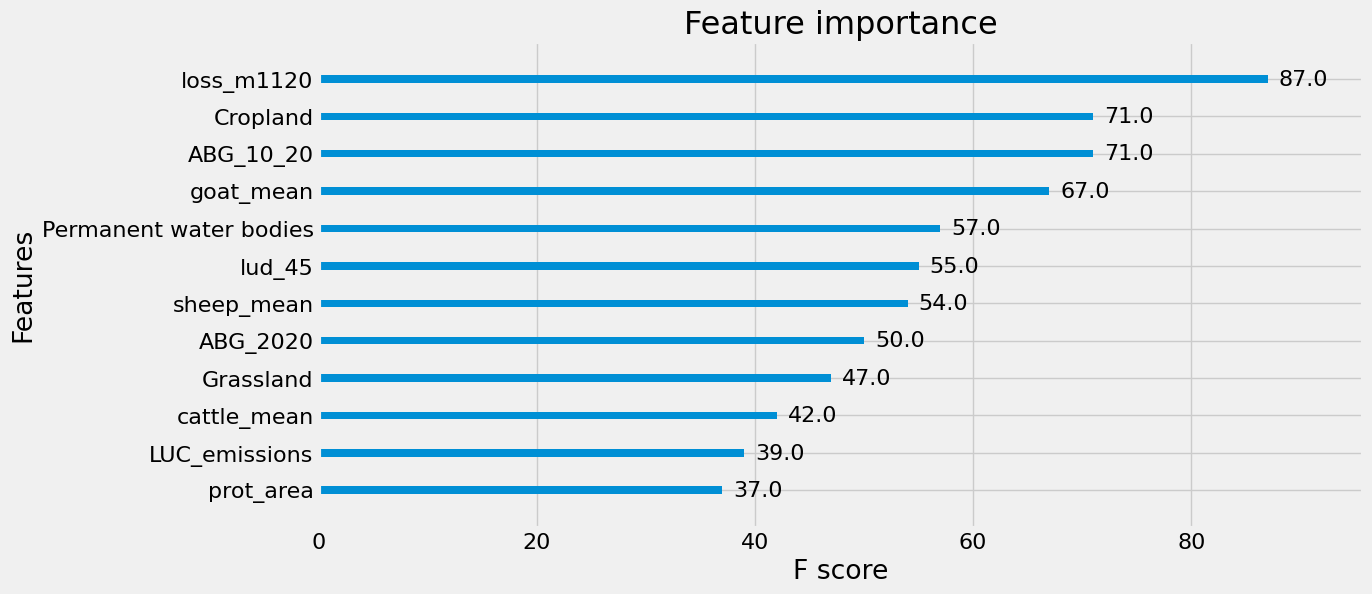

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor2, max_num_features=20, ax=ax)
plt.show();

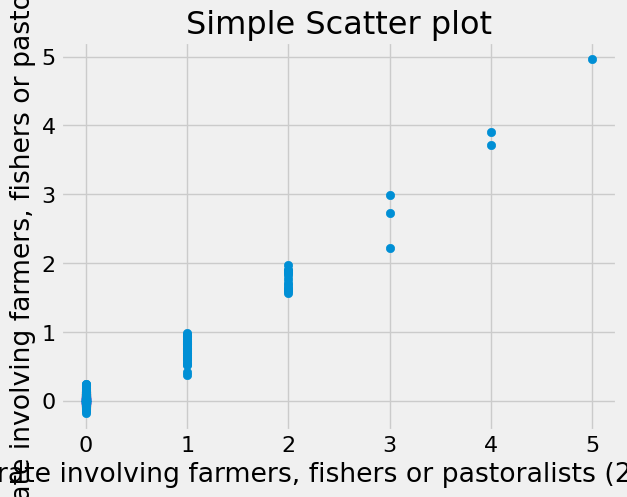

In [19]:
plt.scatter(y, y_predicted_test)
plt.rcParams.update({'figure.figsize':(25,23), 'figure.dpi':300})
plt.title('Simple Scatter plot')
plt.xlabel('Death rate involving farmers, fishers or pastoralists (2011-2020)')
plt.ylabel('Predicted Death rate involving farmers, fishers or pastoralists (2011-2020)')
plt.show()

In [20]:
regressor2.save_model("my_model_LOOCV_UNDP_NEVENTS.model")

D:\conda\envs\sklearn-env\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [21]:
scores2 = cross_val_score(regressor2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [22]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
print('neg_mean_absolute_error: %.3f (%.3f)' % (mean(scores2), std(scores2)))

neg_mean_absolute_error: -0.172 (0.366)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [24]:
#https://www.educative.io/answers/regression-using-xgboost-in-python
y_predicted_test2 = search.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
#test
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test,y_predicted_test2)
r2 = r2_score(y_test,y_predicted_test2)

print("Mean Squared Error (test):", mse)
print("R-squared Score (test):", r2)
#all
# Calculate the mean squared error and R-squared score
mse_t = mean_squared_error(y, y_predicted_test)
r2_t = r2_score(y, y_predicted_test)

print("Mean Squared Error (model):", mse_t)
print("R-squared Score (model):", r2_t)

Mean Squared Error (test): 0.008533423998250175
R-squared Score (test): 0.9592479467391968
Mean Squared Error (model): 0.006677537598425048
R-squared Score (model): 0.9495639801025391


In [27]:
df2['pred_n_events'] = y_predicted_test

C:\Users\cami_\AppData\Local\Temp\ipykernel_9912\1588145821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pred_n_events'] = y_predicted_test


In [28]:
df2['pred_n_events_f'] = y_predicted_test

C:\Users\cami_\AppData\Local\Temp\ipykernel_9912\1477390588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pred_n_events_f'] = y_predicted_test


In [ ]:
#df2.loc[df.pred_n_fat_pop_fixed <0 , 'pred_n_fat_pop_fixed'] = 0

In [29]:
df2.to_excel("D:/CIAT_DEFORESTATION/RESULTS/XGBOOST_RESULTS_UNDP_NEVENTS.xlsx")

In [30]:
import joblib

#save your model or results
joblib.dump(search, 'XGBOOST_LEAVE_UNDP_NEVENTS.pkl')

#load your model for further usage
#joblib.load("XGBOOST_LEAVE.pkl")

['XGBOOST_LEAVE_UNDP_NEVENTS.pkl']

In [31]:
cv_results.to_excel("D:/CIAT_DEFORESTATION/RESULTS/XGBOOST_RESULTS_UNDP_CVGRID_NEVENTS.xlsx")

In [32]:
import joblib
search = joblib.load("XGBOOST_LEAVE_UNDP_NEVENTS.pkl")

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
#mport seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


In [34]:
"""
df = pd.read_csv('D:/CIAT_DEFORESTATION/RESULTS/DATA_20240605.csv');
df.set_index('GID_3', inplace=True)
print("DataFrame with 'GID_3' column as row names:")

df3 = df[            ["tc_loss_med_11_20",
                      #"median_pop_2010_2020",
                      "ABG_2010_2020",
                      "cattle_mean" ,
                      "lud_45" ,
                      "LUC_emissions" ,
                      "goat_mean" ,
                      "sheep_mean",
                      "protarea_area",
                      "Cropland",
                      "Tree cover",
                      "Grassland"
                     ]]                 
#print(df)
feature_importances = search.best_estimator_.feature_importances_
hd = list(df3.columns)
for i, f in zip(hd, feature_importances):
     print(i,round(f*100,2))
     """

'\ndf = pd.read_csv(\'D:/CIAT_DEFORESTATION/RESULTS/DATA_20240605.csv\');\ndf.set_index(\'GID_3\', inplace=True)\nprint("DataFrame with \'GID_3\' column as row names:")\n\ndf3 = df[            ["tc_loss_med_11_20",\n                      #"median_pop_2010_2020",\n                      "ABG_2010_2020",\n                      "cattle_mean" ,\n                      "lud_45" ,\n                      "LUC_emissions" ,\n                      "goat_mean" ,\n                      "sheep_mean",\n                      "protarea_area",\n                      "Cropland",\n                      "Tree cover",\n                      "Grassland"\n                     ]]                 \n#print(df)\nfeature_importances = search.best_estimator_.feature_importances_\nhd = list(df3.columns)\nfor i, f in zip(hd, feature_importances):\n     print(i,round(f*100,2))\n     '

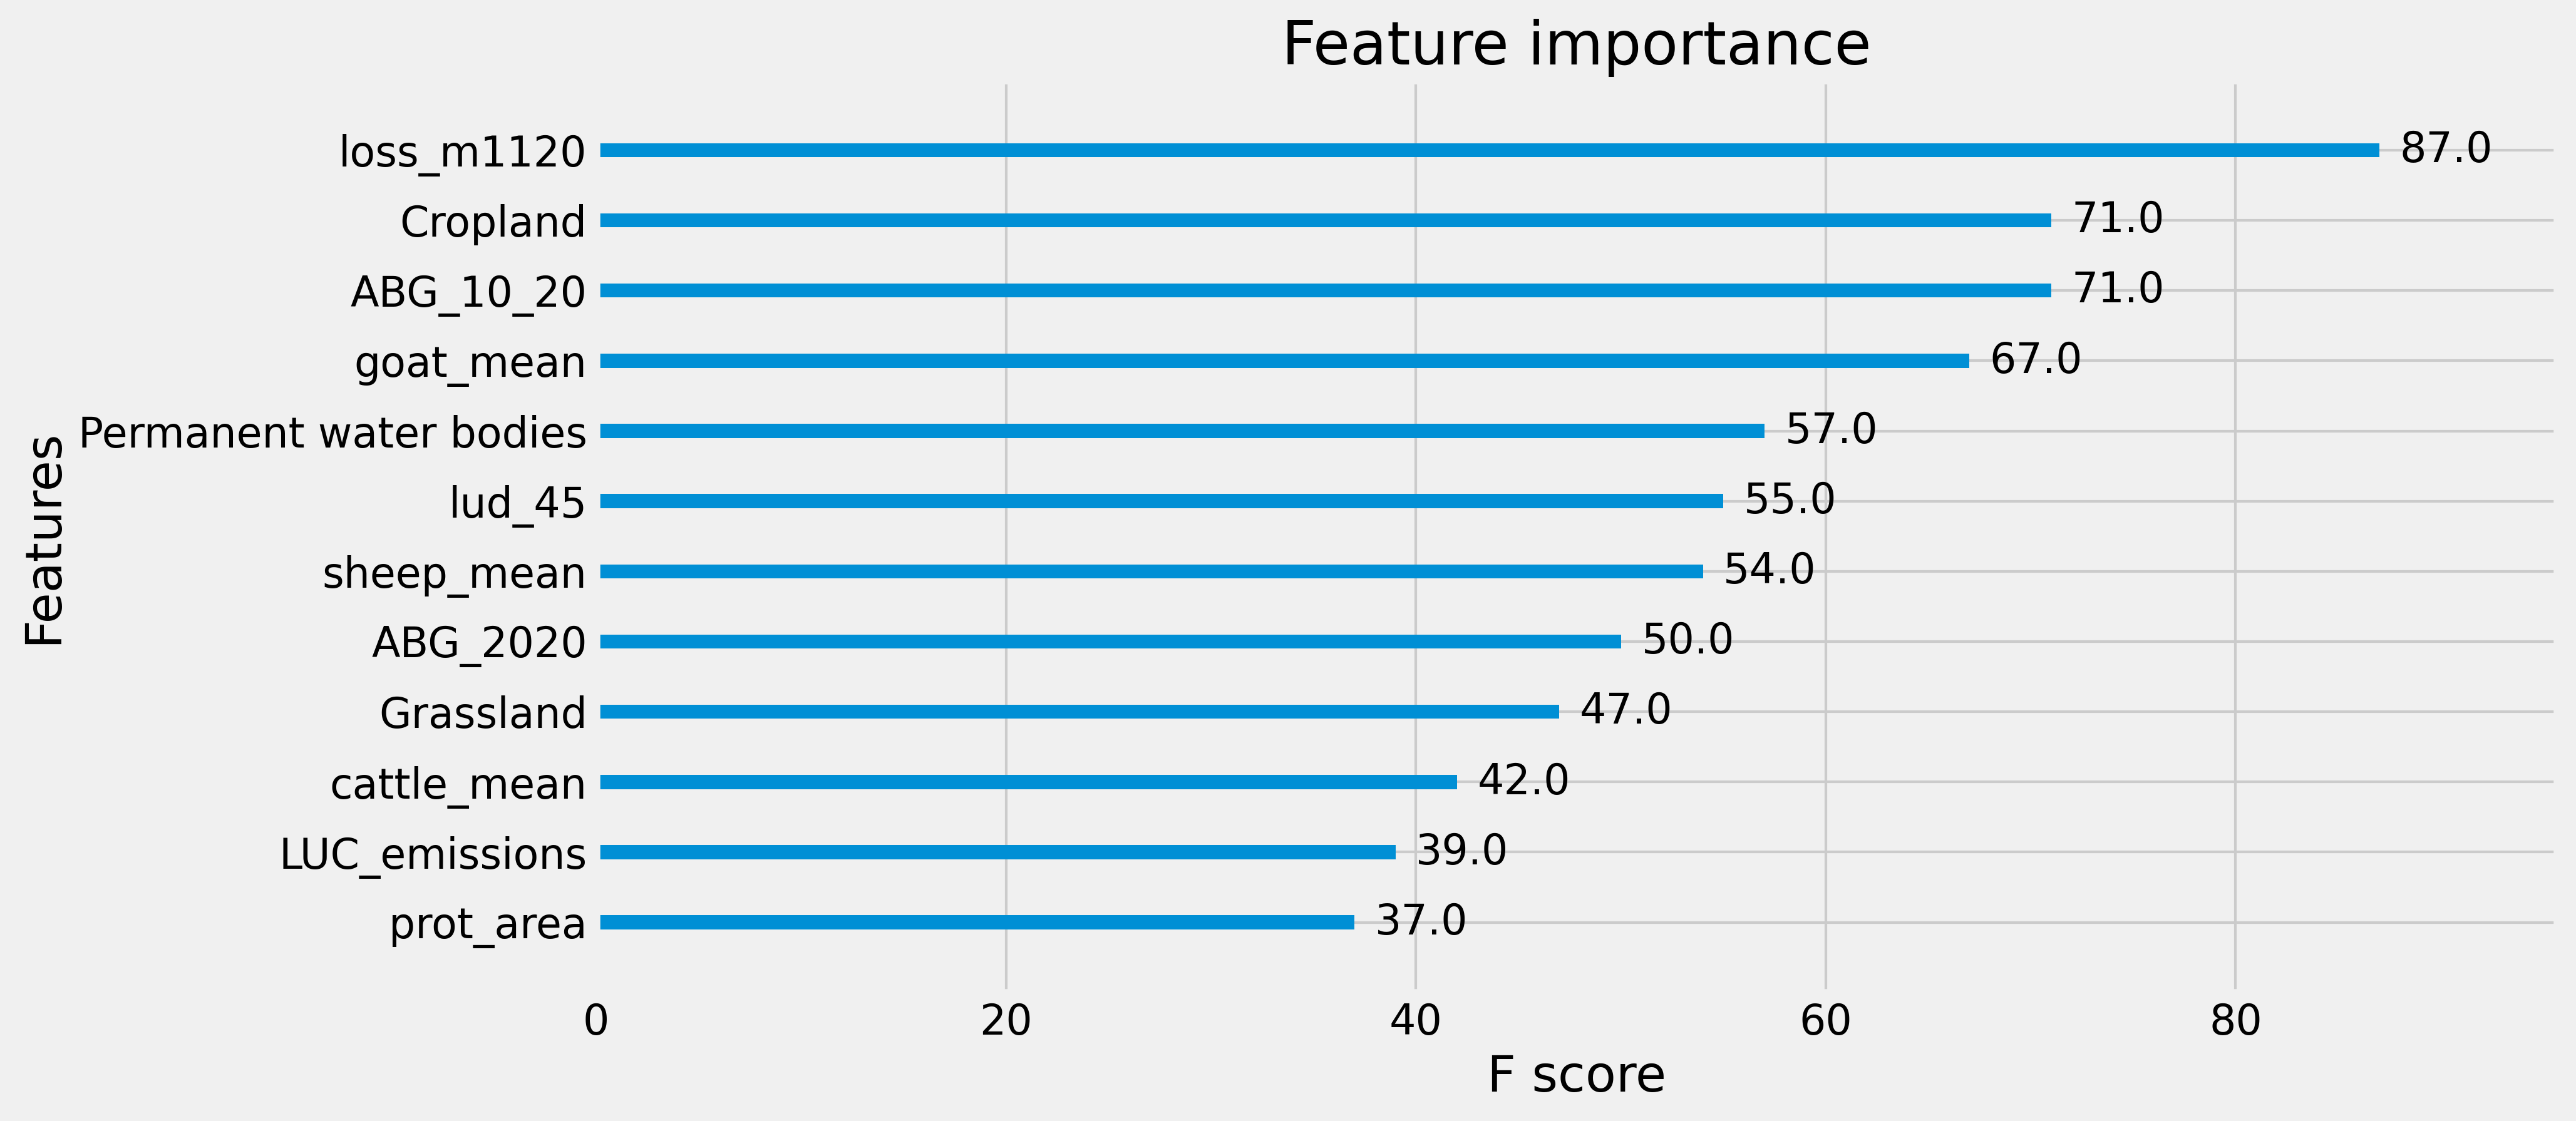

In [35]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(search.best_estimator_, max_num_features=20, ax=ax)
plt.show();